# Clustering Income Spent using Hierarchical Clustering

# Importing the basic libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
dataset = pd.read_csv('dataset.csv')

# Summarize Dataset

In [5]:
print(dataset.shape)

(200, 5)


In [6]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score'], dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score'>

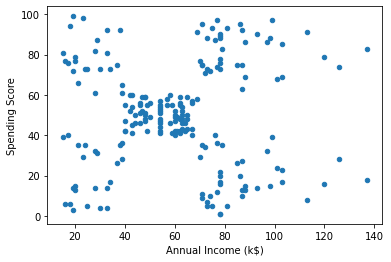

In [8]:
 dataset.plot.scatter(x='Annual Income (k$)', y= 'Spending Score')

In [10]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Label Encoding

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [14]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Mapping

In [16]:
# dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'female':0}).astype(int)
# print(dataset.head())

# Fitting the Hierarchical Clustering to the dataset with n=5

In [21]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage= 'average')
y_means = model.fit_predict(dataset)

# Visualizing the number of clusters n=5

In [25]:
X= dataset.iloc[:, [3,4]]

labels = model.labels_
labels = pd.DataFrame(labels)
X = pd.DataFrame(X)

df = pd.concat([X, labels], axis=1)
df = df.rename(columns = {0: 'label'})
df

,Annual Income (k$),Spending Score,label
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,0
197,126,74,0
198,137,18,0


C:\Users\91807\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:236: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


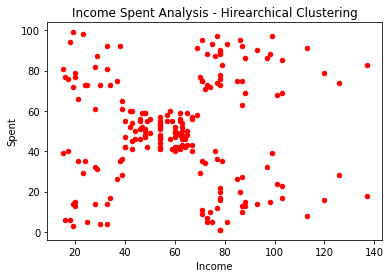

In [40]:
dataset.plot.scatter(x='Annual Income (k$)', y= 'Spending Score', color='r', colormap= 'Set1')

plt.title('Income Spent Analysis - Hirearchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

In [42]:
X= dataset.iloc[:, [3,4]].values
plt.scatter(X[y_means==0, 0])

TypeError: scatter() missing 1 required positional argument: 'y'